<a href="https://colab.research.google.com/github/S-HILPA-S/CASE-STUDIES/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CUSTOMER CHURN PREDICTION**

# **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score

# **Loading dataset from google drive**

In [2]:
# loading dataset from google drive
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = "/content/drive/MyDrive/DSA ICT/DATA/CUSTOMER CHURN PREDICTION/Training_data.csv"
test_path = "/content/drive/MyDrive/DSA ICT/DATA/CUSTOMER CHURN PREDICTION/Testing_data.csv"

df_train = pd.read_csv(train_path)
df_test =pd.read_csv(test_path)

# **EXPLORATORY DATA ANALYSIS**

Not all EDA needs to be done in TEST DATA .

 To understand the distribution of each
 feature and its relationship with the target variable, Churn,only train data is used.

 To identify missing values, outliers, and other data quality issues ,both datasets are used.


In [4]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [5]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [6]:
# defining functions to understanding the data

def perform_eda(df):
    print("\nInfo ")
    print("\n",df.info())


    print("\n \n \n Missing Values")
    print("\n",df.isnull().mean()*100)


    print("\n \n \n Unique Values")
    print("\n ",df.nunique())

    print("\n \n \n Checking Duplicates")
    print("\n RoW Duplicates",df.duplicated().sum())
    print("\n Column Duplicates",df.T.duplicated().sum())

    print("\n \nDescriptive Statistics")
    print("\n",df.describe())


    if 'Churn' in df.columns:
        print("\n \n Target Variable Distribution")
        print(df['Churn'].value_counts())

In [7]:
perform_eda(df_train)


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   o

Inference:


1) info :

The type of the column "MonthlyCharges" is of type object but is actually float.

2) missing values :

 The columns gender(categorical),online security(categorical) ,MonthlyCharges(numerical),TotalCharges(numerical)  has small percentage of missing values which needs to be treated.

 3)There is no duplicates in both columns and rows.

In [8]:
perform_eda(df_test)


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   o

In this set we only have to change the type of column Totalcharges to float as it is denoted by object in the data .

In [9]:
# removing unwanted columns

df_train = df_train.drop("customerID",axis=1)
df_test = df_test.drop("customerID",axis=1)

In [10]:
# changing type column TotalCharges
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

In [11]:
def handle_missing(df, skew_threshold=1):
    for col in df.columns:
        if df[col].dtype == 'object':  # categorical
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # numerical
            skewness = df[col].skew(skipna=True)
            if abs(skewness) < skew_threshold:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    return df

df_train = handle_missing(df_train)
df_test = handle_missing(df_test)

/tmp/ipython-input-89037055.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-89037055.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [12]:
perform_eda(df_train) # checking whether we get the desired results


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   o

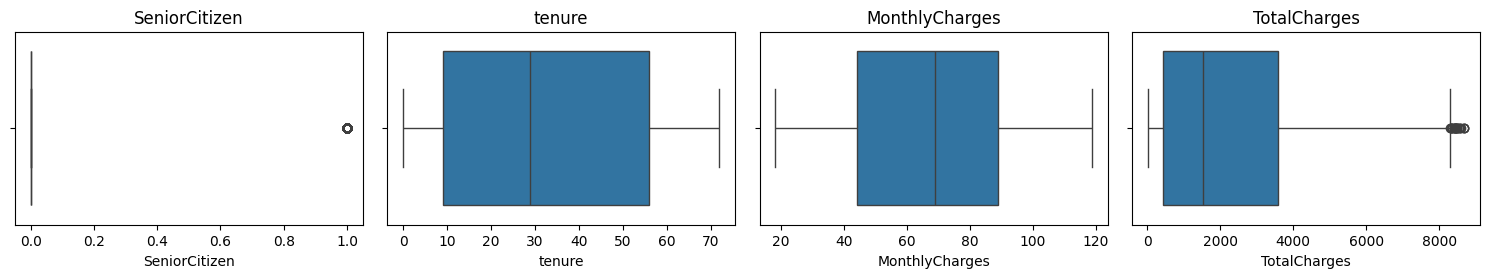

In [13]:

# outliers detection in train dataset
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

The column Total charges contain outliers.

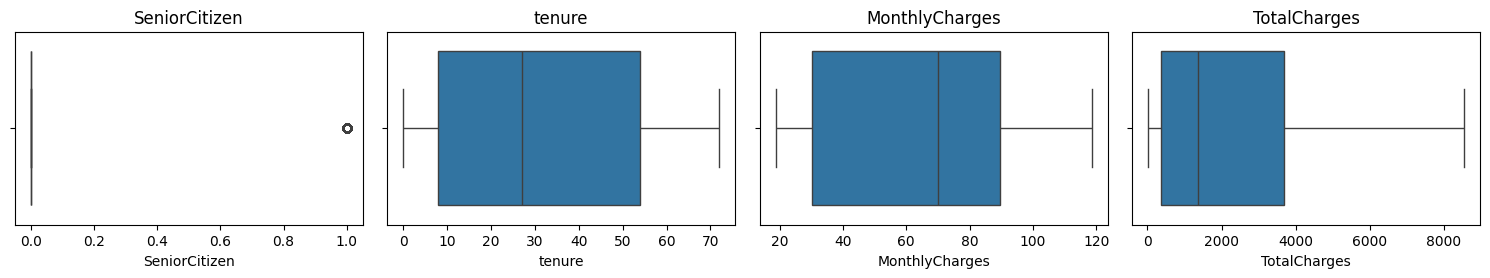

In [14]:

# outliers detection in test dataset
numerical_cols = df_test.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df_test[col])
    plt.title(col)

plt.tight_layout()
plt.show()

No outliers is present.

In [15]:
# handling outliers:
Q1 = df_train['TotalCharges'].quantile(0.25)
Q3 = df_train['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [16]:
outliers = []
for i in df_train['TotalCharges']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[8349.45, 8496.7, 8476.5, 8309.55, 8317.95, 8332.15, 8404.9, 8425.15, 8670.1, 8684.8, 8468.2, 8333.95, 8594.4, 8399.15, 8456.75, 8436.25, 8477.6, 8425.3, 8543.25, 8672.45, 8564.75, 8349.7, 8529.5, 8424.9]


<Axes: ylabel='TotalCharges'>

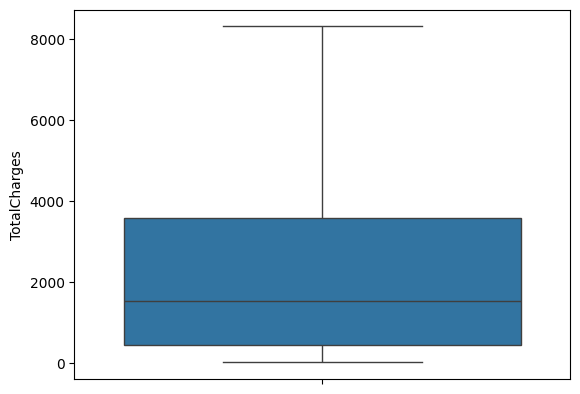

In [17]:
df_train['TotalCharges'] = df_train['TotalCharges'].clip(low_limit, up_limit)
sns.boxplot(data = df_train['TotalCharges'])

In [ ]:
#